## Capstone Project on Handwritten Digit Recognition

## Introduction:

Handwritten Digit Recognition is  one of the most widely used dataset in Deep learning field under computer vison.
Here we have a data set which has  70000 images of handwritten digits with diffrent orientation,style,constrat and handwriting.
Below is an example of how images would look  like.
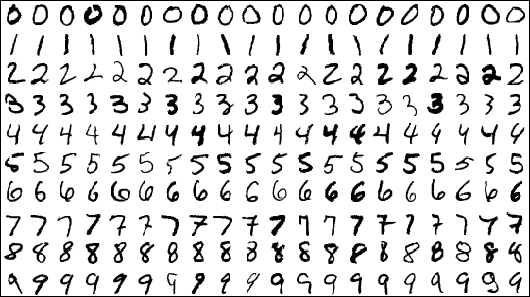

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

## Data Collection

Import the Training and Testing datasets and analyse the data sets

In [98]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
digits=pd.read_csv(r'C:\Users\M1043042\Desktop\DSC\Capstone Two\Dataset\train.csv')

In [100]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Columns and Rows and its significance

In [101]:
digits.shape

(42000, 785)

In [102]:
#Nan values check
nan = digits.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


So there are 42000 images in the training dataset, with 785 columns where first column is a label column which signifies which digit pixel values are present in pixel0 to pixel783 so totally 784 pixels which are arranged sequentially converted from 
28 x 28 matrix,which is shown below
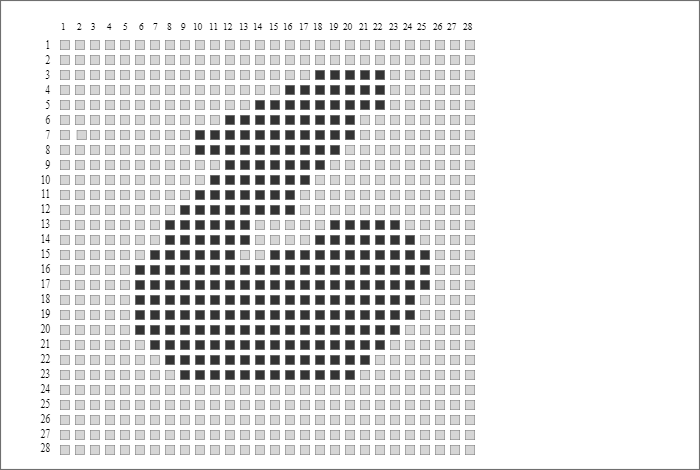

separate the label column from the dataframe

In [103]:
digits_in_pixel=digits.iloc[:,1:]

In [104]:
digits_in_pixel.shape

(42000, 784)

In [105]:
digits_in_pixel.index

RangeIndex(start=0, stop=42000, step=1)

Take a random image and print the image

In [106]:
some_digit=digits_in_pixel.iloc[2000]

In [107]:
some_digit=some_digit.values.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

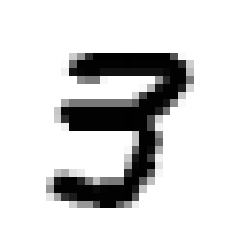

In [108]:
plt.imshow(some_digit,cmap="binary")
plt.axis('off')

Validate the value present in label  column at same location

In [109]:
digits.iloc[2000,0]

3

Print first 20 images in the dataset to see the different digits and there style and orientation.

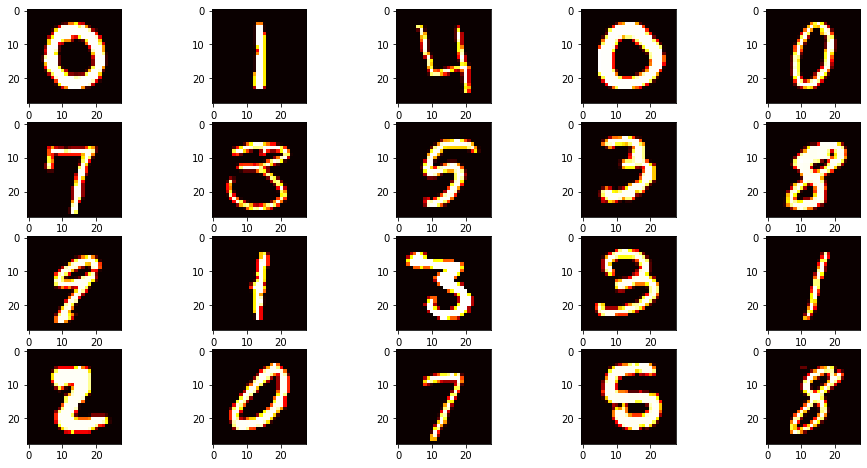

In [110]:
fig=plt.figure(figsize=(16, 8))
for i in range(1,21):
    img=digits_in_pixel.iloc[i].values.reshape(28,28)
    fig.add_subplot(4,5,i)
    plt.imshow(img,cmap="hot")
    #plt.axis('off')

In [111]:
digits_count=digits['label'].value_counts()

In [112]:
digits_count

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Text(0, 0.5, 'count of digits')

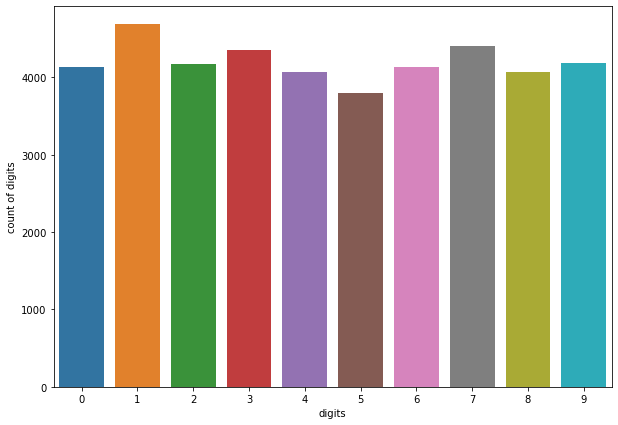

In [113]:
plt.figure(figsize=(10,7))
sns.barplot(x=digits_count.index,y=digits_count,data=digits)
#plt.plot(digits_count.index,digits_count,kind='scatter')
plt.xlabel('digits')
plt.ylabel('count of digits')

In [114]:
def calculate_mean(digit_series):
    mean_list=list()
    for i in range(784):
        mean=digit_series['pixel'+str(i)].mean()
        mean_list.append(mean)
    return mean_list


In [115]:
digit_eight=digits[digits['label']==8]

In [116]:
digit_eight=digit_eight.iloc[:,1:]

In [117]:
eight_mean=calculate_mean(digit_eight)

In [118]:
eight_array=np.array(eight_mean)

In [119]:
#eight_mean=eight_array[eight_array>26]

(-0.5, 27.5, 27.5, -0.5)

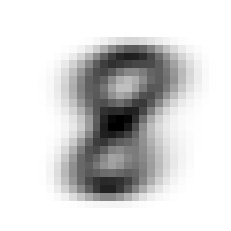

In [120]:
plt.imshow(eight_array.reshape(28,28),cmap='binary')
plt.axis('off')

In [121]:
digit_zero=digits[digits['label']==0]

In [122]:
digit_zero=digit_zero.iloc[:,1:]

In [123]:
zero_mean=calculate_mean(digit_zero)

In [124]:
zero_array=np.array(zero_mean)

(-0.5, 27.5, 27.5, -0.5)

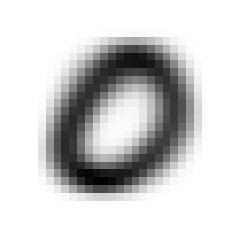

In [125]:
plt.imshow(zero_array.reshape(28,28),cmap='binary')
plt.axis('off')

In [126]:
digit_five=digits[digits['label']==5]

In [127]:
digit_five=digit_five.iloc[:,1:]

In [128]:
five_mean=calculate_mean(digit_five)

In [129]:
five_array=np.array(five_mean)

In [130]:
five_mean=five_array.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

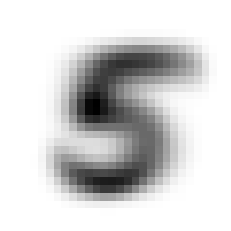

In [131]:
plt.imshow(five_mean,cmap='binary')
plt.axis('off')

In [132]:
df=pd.DataFrame({'eight':eight_array,
                'zero':zero_array,
                'five':five_array})

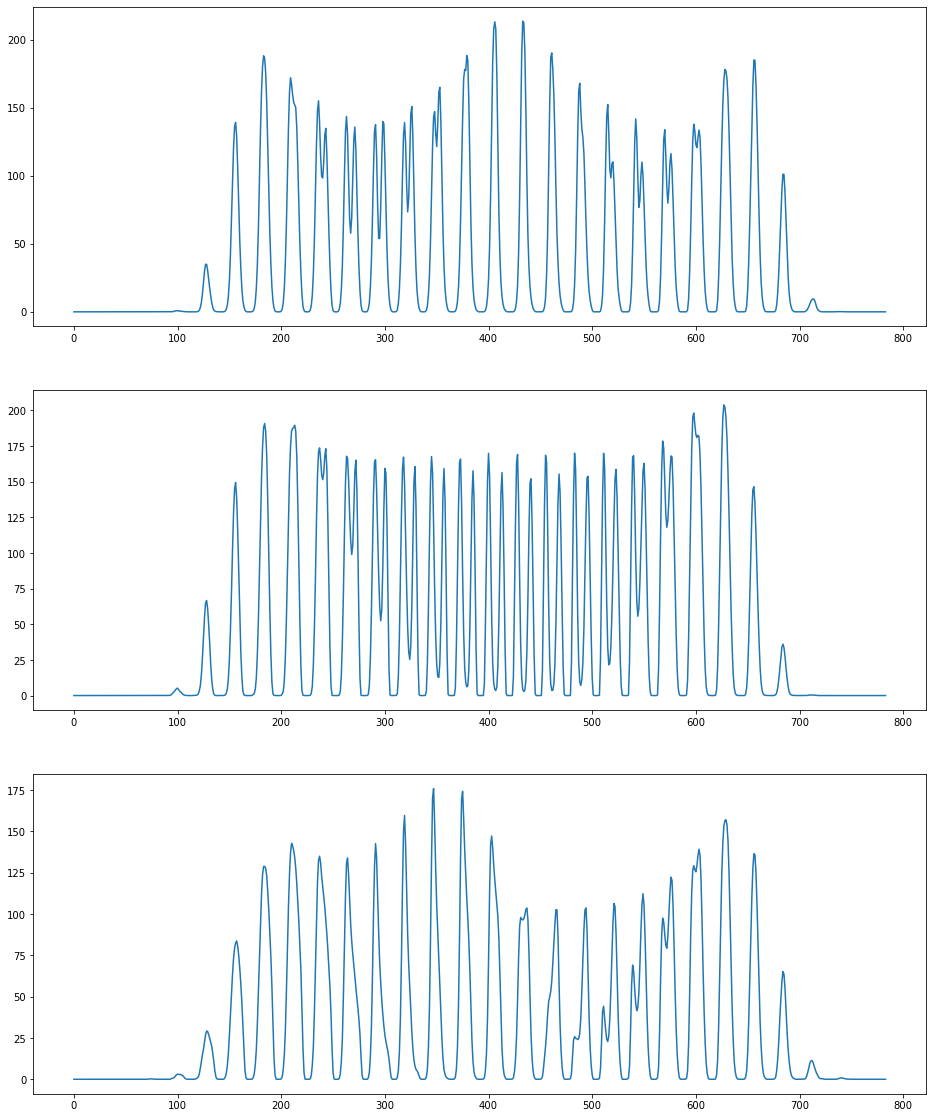

In [133]:
fig=plt.figure(figsize=(16,20))
fig.add_subplot(3,1,1)
plt.plot(df.eight)
fig.add_subplot(3,1,2)
plt.plot(df.zero)
fig.add_subplot(3,1,3)
plt.plot(df.five)


calculate the euclidean distance between mean of 5 and all other remining digits, the minimum distance should be the digit 5
and plot the same

In [224]:
#digit_five=digits[digits['label']==5][0]
df=pd.DataFrame()
digi_list=[]
for i in range(10):
    dig=digits[digits['label']==i]
    normal_digit=dig.iloc[0,1:]
    df[i]=normal_digit
    dist=np.linalg.norm(five_array-normal_digit)
    digi_list.append(dist)
    

In [225]:
df=df.T

In [226]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
digi_list

[2529.726888994446,
 1824.1481881908367,
 2196.7665642130937,
 1921.6099675243336,
 1917.0035385022402,
 1599.7494307553025,
 1995.0185048960832,
 1794.4900511580465,
 2157.8584010881204,
 1725.0258902688474]

from the above list we find that minimum distance between mean of 5 and digit is 1599.74, so lets plot the digit which gave the minimum distance from mean of Digit 5

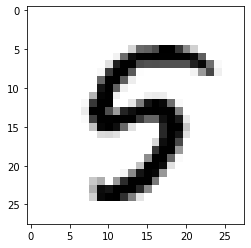

In [228]:
plt.imshow(np.array(df.iloc[5,:]).reshape(28,28),cmap='binary')